In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [263]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [264]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [265]:
df.rename(columns={'Chance of Admit ':'Admission_rate'},inplace=True)

In [267]:
df #the admission rate (y) is a probability so we're going to choose a threshold for the admadmission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission_rate
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [268]:
df=df.iloc[:,1:]

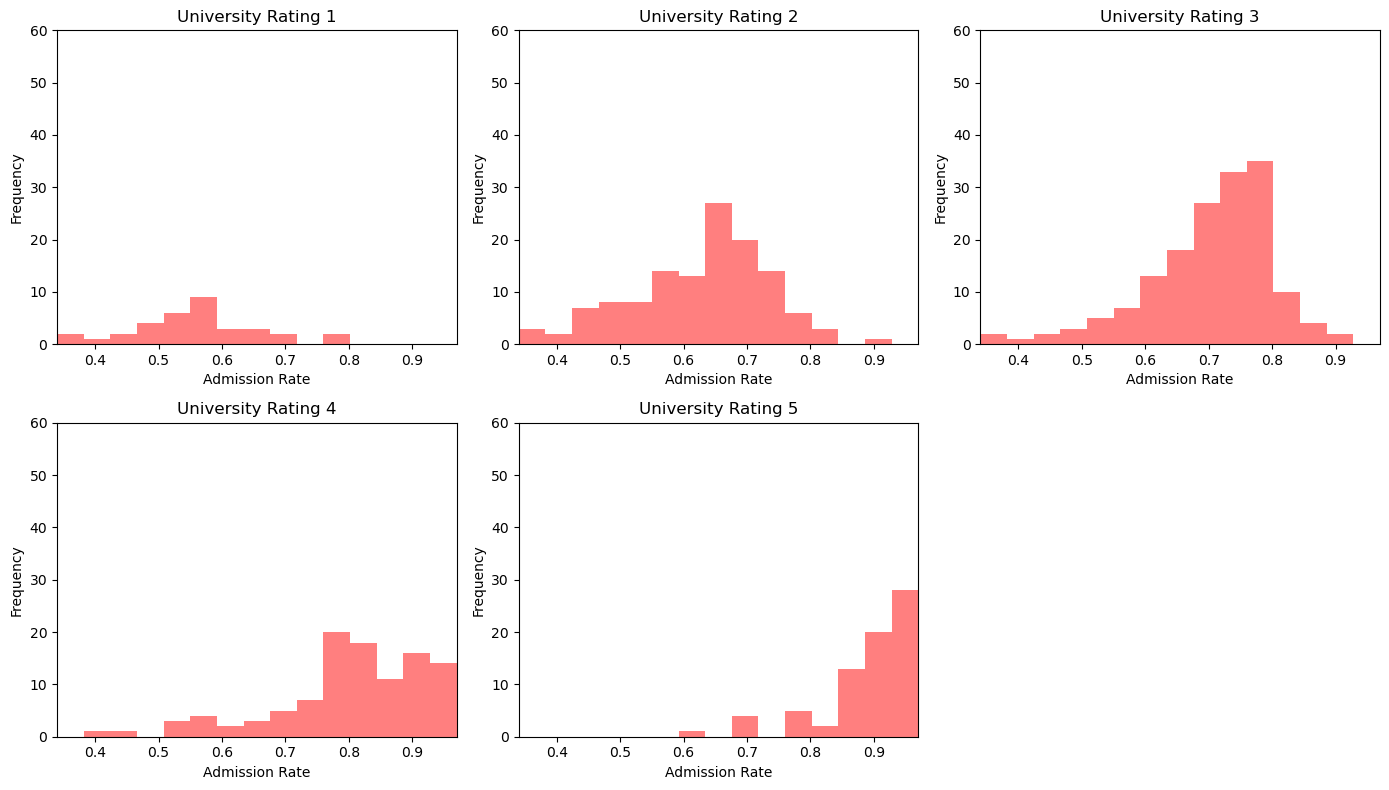

In [269]:
unique_ratings = sorted(df['University Rating'].unique())

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()

# Define common x and y-axis limits
x_min, x_max = df['Admission_rate'].min(), df['Admission_rate'].max()
y_max = 30  # Adjust this value based on your data

# Iterate through each university rating and plot the histogram in a subplot
for i, rating in enumerate(unique_ratings):
    ax = axes[i]
    data = df[df['University Rating'] == rating]['Admission_rate']
    ax.hist(data, bins=15, alpha=0.5, color='red', range=(x_min, x_max))
    ax.set_title(f'University Rating {rating}')
    ax.set_xlabel('Admission Rate')
    ax.set_ylabel('Frequency')
    ax.set_xlim(x_min, x_max)  # Set x-axis limits
    ax.set_ylim(0, 60)      # Set y-axis limits

# Remove any empty subplots if there are an odd number of ratings
if len(unique_ratings) % 2 == 1:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [270]:
df['Admission_rate']=df['Admission_rate'].apply(lambda x: 1 if x >0.6 else 0) #if the addmission rate is higher than 60% put 1 as accepted
df['Admission_rate'].nunique()

2

In [271]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [272]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [273]:
y_pred=model.predict(X_test)

In [274]:
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.2f}\nTest Accuracy:{test_accuracy}")


Training Accuracy: 0.91
Test Accuracy:0.9
